In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

In [5]:
file_path = "C:/Users/mohda_vikbi4d/Downloads/Python_project/AB_NYC_2019.csv"

In [6]:
df = pd.read_csv(file_path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
print("Shape:", df.shape)

Shape: (48895, 16)


In [8]:
print("\nColumns:\n", df.columns.tolist())


Columns:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [9]:
print("\nData types:\n",df.dtypes)



Data types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [10]:
print("\n\nNon-null counts & missing values per column:")
print(df.isnull().sum())



Non-null counts & missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [11]:
print("\nNumber of unique values per column (sample):")
print(df.nunique().sort_values(ascending=False))


Number of unique values per column (sample):
id                                48895
name                              47905
host_id                           37457
latitude                          19048
longitude                         14718
host_name                         11452
last_review                        1764
reviews_per_month                   937
price                               674
number_of_reviews                   394
availability_365                    366
neighbourhood                       221
minimum_nights                      109
calculated_host_listings_count       47
neighbourhood_group                   5
room_type                             3
dtype: int64


In [12]:
df['name'] = df['name'].fillna("Unknown")  #.fillna() is used to fill the null/missing values with given values
df['host_name'] = df['host_name'].fillna("Unknown")

In [14]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [16]:
print("Missing values after cleaning:\n", df.isnull().sum())
print("\nData types after conversion:\n\n", df.dtypes)

Missing values after cleaning:
 id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Data types after conversion:

 id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                         

In [17]:
# Quick look at last_review
print("\nLast review date range:", df['last_review'].min(), "to", df['last_review'].max())


Last review date range: 2011-03-28 00:00:00 to 2019-07-08 00:00:00


In [18]:
# Count duplicates before removal
duplicates_before = df.duplicated().sum()
print("Number of duplicate rows before removal:", duplicates_before)


Number of duplicate rows before removal: 0


In [19]:
df = df.drop_duplicates()

In [20]:
# Count again
duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after removal:", duplicates_after)

Number of duplicate rows after removal: 0


In [26]:
# Shape after cleaning
print("Shape after duplicate removal:", df.shape)

Shape after duplicate removal: (48895, 16)


In [21]:
# Step 4: Standardization of categorical values
# Check unique values before cleaning
print("Neighbourhood Groups (before):", df['neighbourhood_group'].unique())
print("Room Types (before):", df['room_type'].unique())

Neighbourhood Groups (before): ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Room Types (before): ['Private room' 'Entire home/apt' 'Shared room']


In [22]:
# Clean text columns (strip spaces, proper casing)
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()


In [23]:
# Verify after cleaning
print("\nNeighbourhood Groups (after):", df['neighbourhood_group'].unique())
print("\nRoom Types (after):", df['room_type'].unique())


Neighbourhood Groups (after): ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Room Types (after): ['Private Room' 'Entire Home/Apt' 'Shared Room']


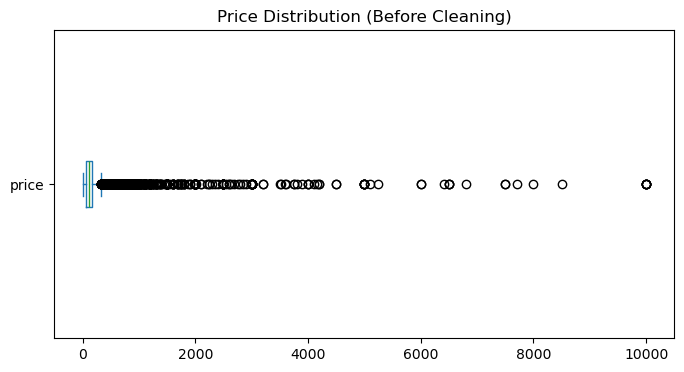

In [24]:
# Step 5: Outlier detection & removal
 # Plot price distribution before filtering
plt.figure(figsize=(8,4))
df['price'].plot(kind='box', vert=False)
plt.title("Price Distribution (Before Cleaning)")
plt.show()

In [25]:
# Filter out unrealistic prices
df = df[df['price'] <= 1000]

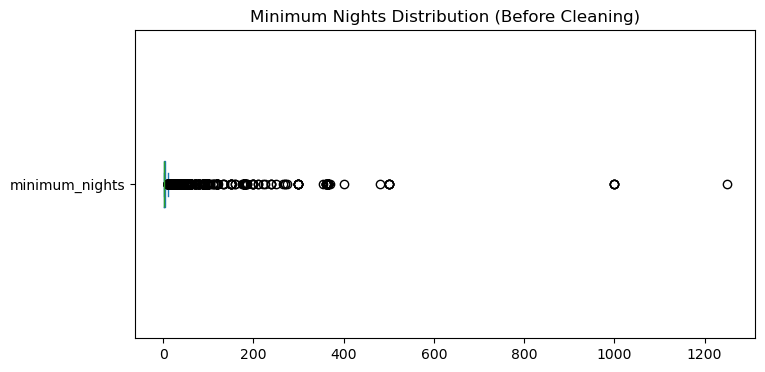

In [29]:
# Plot minimum_nights distribution before filtering
plt.figure(figsize=(8,4))
df['minimum_nights'].plot(kind='box', vert=False)
plt.title("Minimum Nights Distribution (Before Cleaning)")
plt.show()

In [30]:
# Filter out unrealistic minimum_nights
df = df[df['minimum_nights'] <= 365]

In [31]:
# Shape after cleaning
print("Shape after removing outliers:", df.shape)
print("Price range:", df['price'].min(), "-", df['price'].max())
print("Minimum nights range:", df['minimum_nights'].min(), "-", df['minimum_nights'].max())

Shape after removing outliers: (48642, 16)
Price range: 0 - 1000
Minimum nights range: 1 - 365


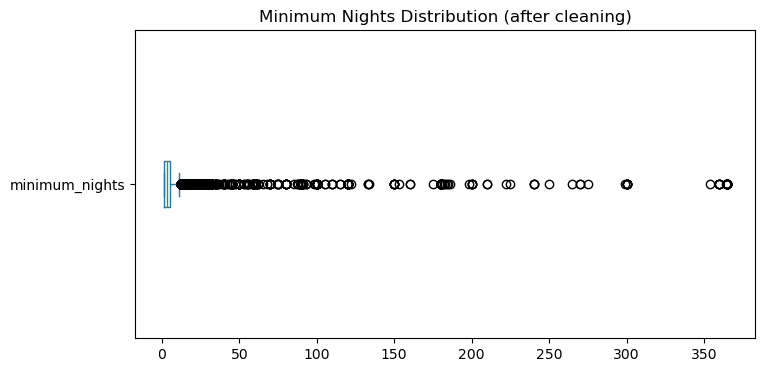

In [32]:
# Plot minimum_nights distribution after filtering
plt.figure(figsize=(8,4))
df['minimum_nights'].plot(kind='box', vert=False)   #Checking the visual after filtering minimum nights
plt.title("Minimum Nights Distribution (after cleaning)")
plt.show()

In [33]:
# Final cleaned dataset

# Final check for missing values
print("Missing values:\n", df.isnull().sum())

# Final check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Final shape
print("\nFinal dataset shape:", df.shape)

# Save cleaned dataset
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'AB_NYC_2019_cleaned.csv'")


Missing values:
 id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9912
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Duplicate rows: 0

Final dataset shape: (48642, 16)

Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'
